In [17]:
include("../EuclidElements.jl");

# Book 1

## Proposition 7

Given two straight lines constructed on a straight line [from its extremities] and meeting in a point, there cannot be constructed on the same straight lines meeting in another point and equal to the former two respectively, namely each to that which has the same extremity with it.

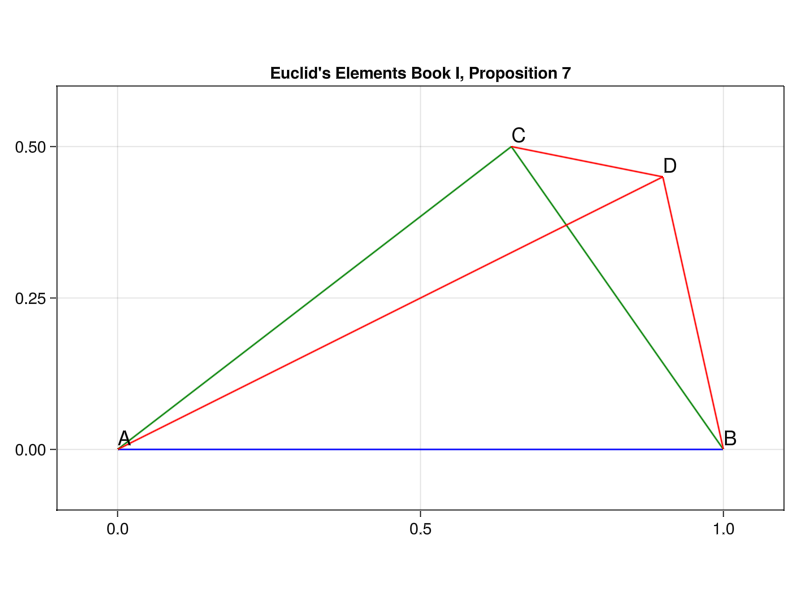

In [15]:
# Start with a line, AB
A = Point2f0(0, 0)
B = Point2f0(1, 0)
# figure AC and BC meet at C from each extremity
C = Point2f0(0.65, 0.5)
# figure AD and BD are "equal" (we prove this is absurd) to AC and BC respectively
D = Point2f0(0.9, 0.45)

# Euclid says that if AC = AD then 
#  ∠ACD = ∠ADC (by I.5); ∠ADC > ∠DCB; ∠CDB >> ∠ ∠DCB 
# Also, since BC = BD then
#  ∠CDB = ∠DCB (by I.5)
# But that's a contradiction! Absurd!

#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 7")
xlims!(ax, -0.1,1.1)
ylims!(ax, -0.1,0.6)

# Draw the lines
lines!([A,B], color=:blue)
lines!([A,C], color=:green)
lines!([B,C], color=:green)
lines!([A,D], color=:red)
lines!([B,D], color=:red)
lines!([C,D], color=:red)

#Now draw the point labels
Apoint = text!(A, text="A")
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C")
Dpoint = text!(D, text="D")


#Draw and show the chart :)
current_figure()

### Animation

In [18]:
# Using the same points as above

#Animation value for final text
absurd_opac = Observable(0f0)

#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 7")
xlims!(ax, -0.1,1.5)
ylims!(ax, -0.1,2.0)

# Draw the initial lines
lines!([A,B], color=:blue)
lines!([A,C], color=:green)
lines!([B,C], color=:green)
lines!([A,D], color=:red)
lines!([B,D], color=:red)

# Draw the 2 angle comparisons
ACD_ADC = compare_triangle(A, C, D, A, D, C, Point2f(0.25, 1.5), 0f0, precision=6,
                                 triangle=false, cursorcolor=:pink, cursorlinewidth=0.5f0, linewidth=5f0, color=:pink)
CDB_DCB = compare_triangle(C, D, B, D, C, B, Point2f(0.25, 1.0), 0f0, precision=6,
                                triangle=false, cursorcolor=:pink, cursorlinewidth=0.5f0, linewidth=5f0, color=:pink)

# Draw the triangle comparison
ABC_ABD = compare_triangle(B, A, C, B, A, D, Point2f(0.25, 1.25), 0f0, precision=6,
                                 triangle=true, cursorcolor=:pink, cursorlinewidth=0.5f0, linewidth=5f0, color=:pink)

# Draw extending CD
CD = straight_line(C, D, color=:red, linewidth=1f0, cursorwidth=0.01f0)

#Now draw the point labels
Apoint = text!(A, text="A")
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C")
Dpoint = text!(D, text="D")


text!(Point2f0(0, 0.75), text="◬ABC = ◬ABD, ever?? ABSURD!", color=@lift(RGBA(1,0,0,$absurd_opac)))

# Draw the animation!
framerate = 24
d_s = 24
timestamps = range(0,4π, step=4π/(d_s*framerate))

record(f, "Euclid-I-7.gif", timestamps; framerate=framerate) do t
    # Animate extending CD
    animate_line(CD, 0.5π, π, t)

    # Now animate the angle and triangle comparisons
    animate_tricompare(ACD_ADC, π, 1.5π, t, fade_start=1.75π, fade_end=2π)
    animate_tricompare(CDB_DCB, 1.5π, 2π, t, fade_start=2.25π, fade_end=2.5π)
    animate_tricompare(ABC_ABD, 2π, 2.5π, t)

    # Draw the absurdity text
    if t > 2.5π
        if t < 2.75π
            absurd_opac[] = (t-2.5π)/0.25π
        else
            absurd_opac[] = 1f0
        end
    end
end;

![animation](Euclid-I-7.gif)